Первые строки датасета:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596


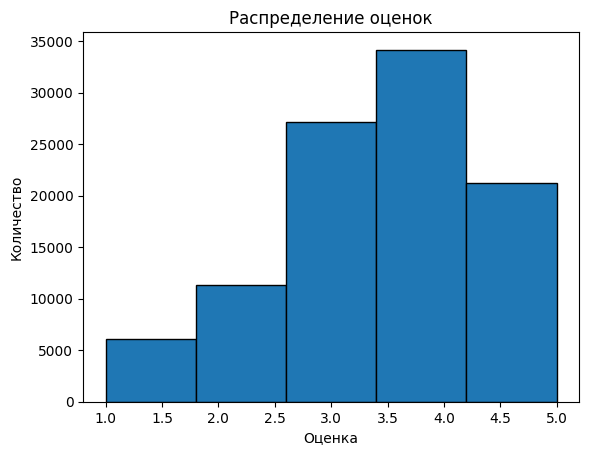

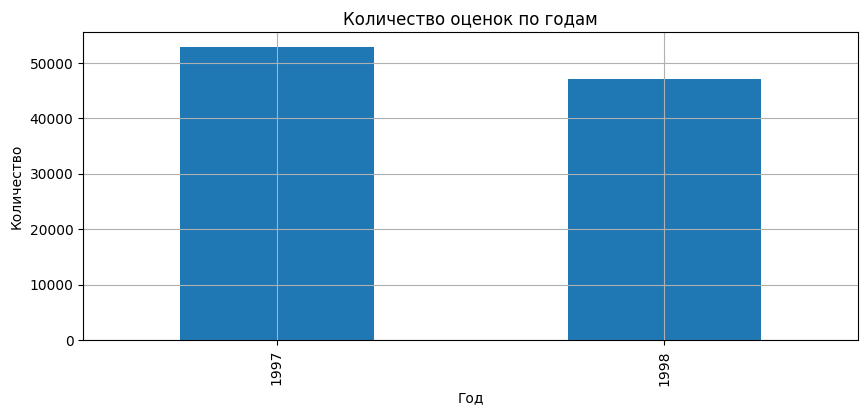

Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.5762 - mae: 1.2408 - val_loss: 1.2361 - val_mae: 0.9105
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.2276 - mae: 0.9128 - val_loss: 1.2427 - val_mae: 0.9269
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2199 - mae: 0.9084 - val_loss: 1.2468 - val_mae: 0.9095
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2293 - mae: 0.9129 - val_loss: 1.2338 - val_mae: 0.9157
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2233 - mae: 0.9099 - val_loss: 1.2362 - val_mae: 0.9228
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2335 - mae: 0.9166 - val_loss: 1.2370 - val_mae: 0.9089
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.2138 - mae: 0.9075 - val_loss: 1.2339 - val_mae: 0.9211
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2296 - mae: 0.9160 - val_loss: 1.2644 - val_mae: 0.9037
Epoch 9/20
2000/2000 ━━━━━━━━━━━━━━━━━━━

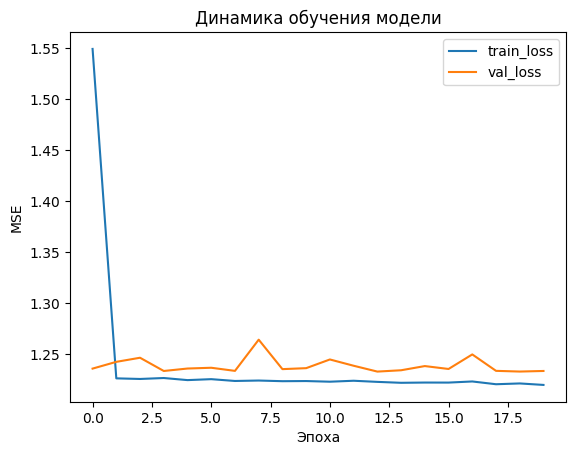

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
df = pd.read_csv('/content/u.data', sep='\t',
                 names=['userId', 'movieId', 'rating', 'timestamp'])
print("Первые строки датасета:")
print(df.head())
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['datetime'].dt.year
plt.hist(df['rating'], bins=5, edgecolor='black')
plt.title("Распределение оценок")
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.show()
df.groupby('year')['rating'].count().plot(kind='bar', figsize=(10,4))
plt.title("Количество оценок по годам")
plt.xlabel("Год")
plt.ylabel("Количество")
plt.grid(True)
plt.show()
le_user = LabelEncoder()
le_movie = LabelEncoder()
df['userId_encoded'] = le_user.fit_transform(df['userId'])
df['movieId_encoded'] = le_movie.fit_transform(df['movieId'])
X = df[['userId_encoded', 'movieId_encoded']].values
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=32,
                    verbose=1)
y_pred = model.predict(X_test_scaled).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²   : {r2:.4f}")
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.title("Динамика обучения модели")
plt.legend()
plt.show()